In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score
import sys
sys.path.append('./src/data_processing/')
from feature import Feature

/anaconda3/envs/p-sci/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/envs/p-sci/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/envs/p-sci/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [54]:
df_raw = pd.read_hdf('./data.nosync/train.h5', key='table')

In [75]:
ttf_df = df_raw['ttf']
signal_filtered = Feature(df_raw['s'], './data.nosync/').r_savgol_filter(window_length=11, polyorder=1).data
df = pd.DataFrame({'ttf': ttf_df, 's_filtered': signal_filtered.squeeze()})

/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


	 Rolling decorator for r_savgol_filter: 


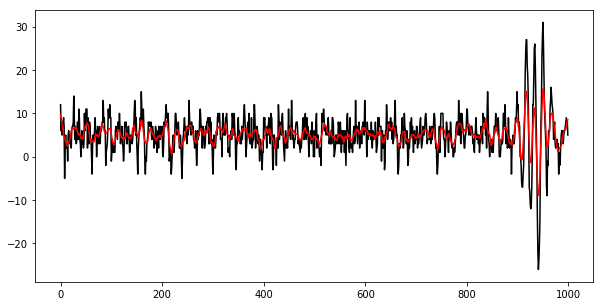

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(df_raw['s'][:1000], 'k')
plt.plot(df['s_filtered'][:1000], 'r')
plt.show()

s_filtered


/anaconda3/envs/p-sci/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Mutual info (10 windows): 0.015586936760970107
253179155


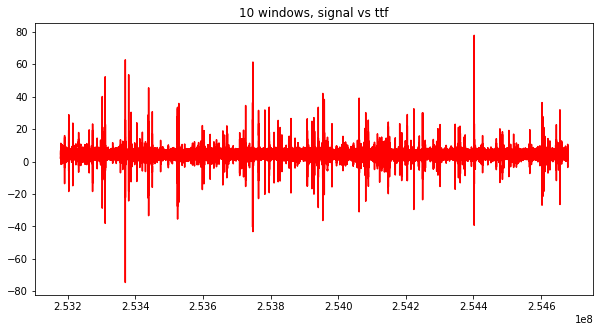

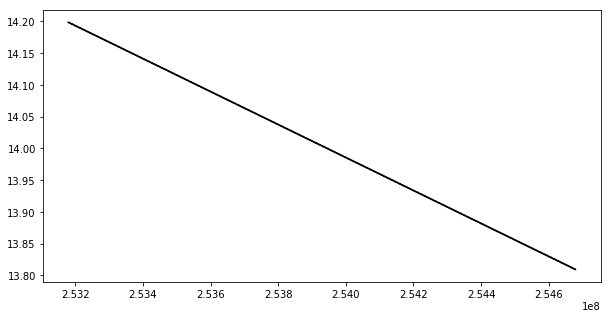

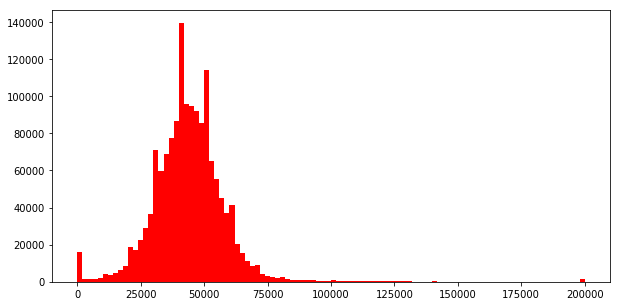

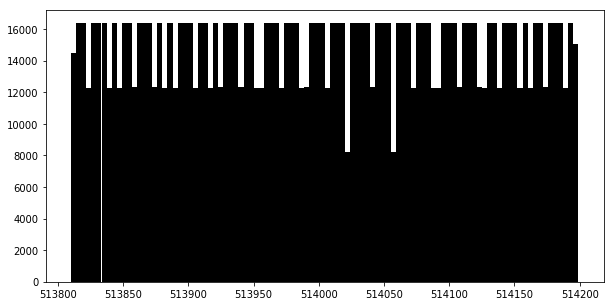

0.024821254898031817


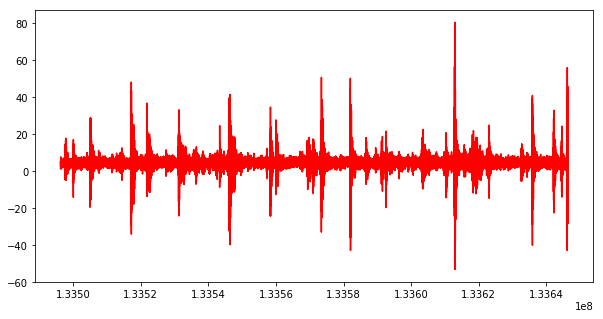

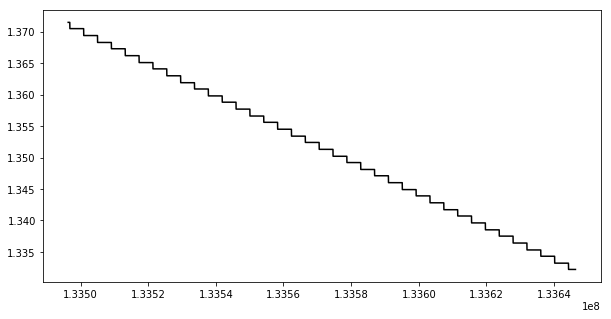

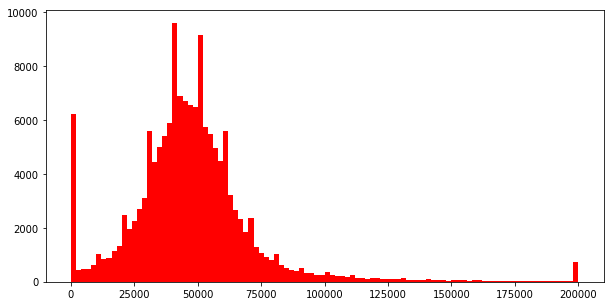

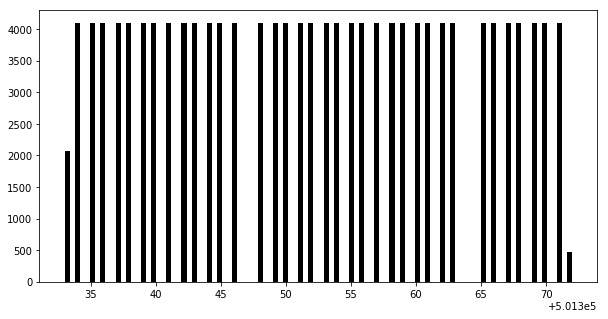

0.0225961295748048


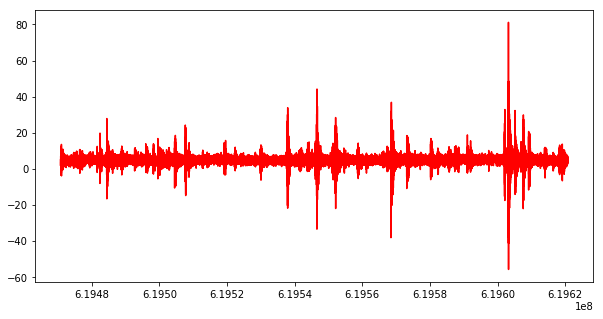

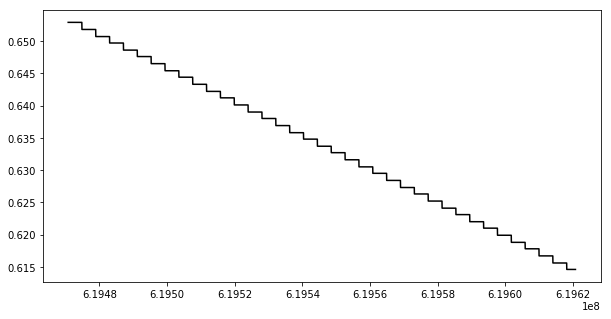

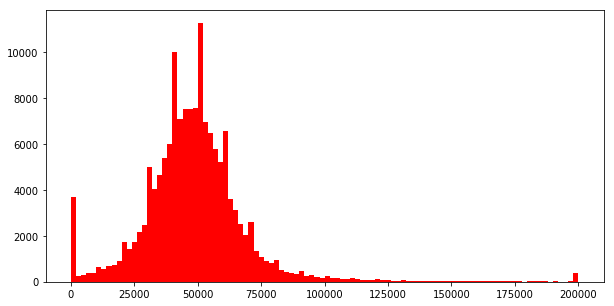

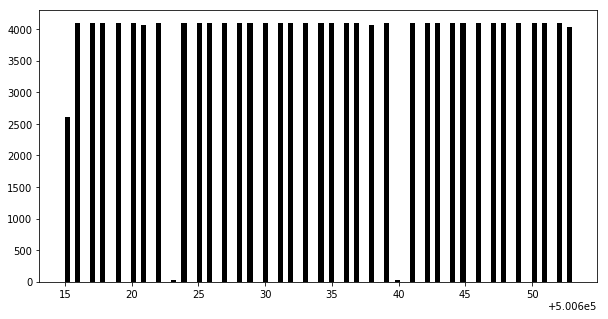

0.014866351046270722


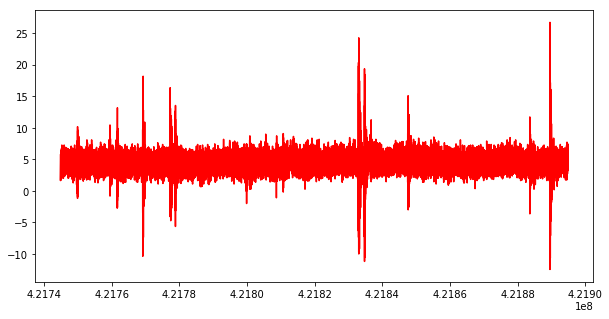

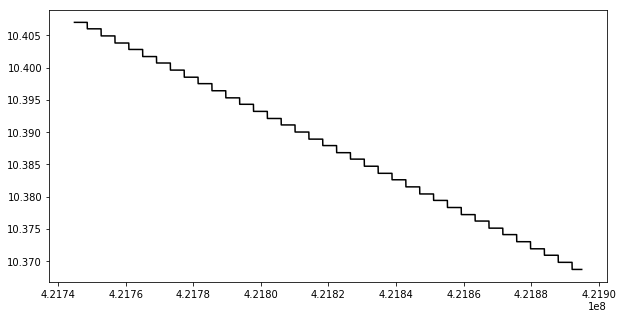

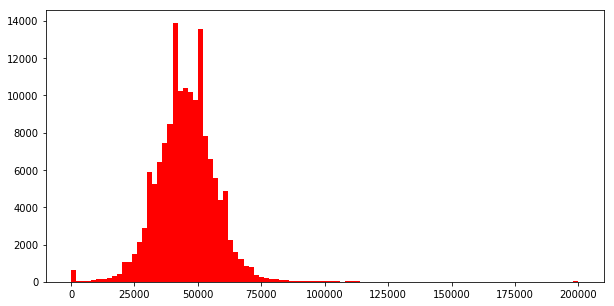

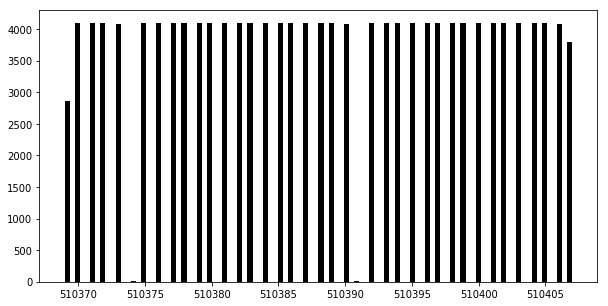

In [77]:
column_idx = 1
print(df.columns[column_idx])

ttf_bins = np.arange(0, 20, 0.0001)
sig_bins = np.arange(-500, 500, 0.001)
#     print(x)


data_size = df.shape[0]

idx = np.random.randint(0, data_size - 1)

signal = lambda n_windows, idx, n_column: df.iloc[idx : idx + int(150000*n_windows)][df.columns[n_column]]

mi_0 = normalized_mutual_info_score(np.digitize(signal(10, idx, -1).values, ttf_bins).flatten(), 
                                    np.digitize(signal(10, idx, 0).values, sig_bins).flatten())

print(f"Mutual info (10 windows): {mi_0}")

print(idx)
plt.figure(figsize=(10, 5))
plt.plot(signal(10, idx, -1), 'r')
plt.title("10 windows, signal vs ttf")
plt.figure(figsize=(10, 5))
plt.plot(signal(10, idx, 0), 'k')
plt.figure(figsize=(10, 5))
plt.hist(np.digitize(signal(10, idx, -1).values, ttf_bins).flatten(), color='r', bins=100)
plt.figure(figsize=(10, 5))
plt.hist(np.digitize(signal(10, idx, 0).values, sig_bins).flatten(), color='k', bins=100)
plt.show()

for i in range(3):
    idx = np.random.randint(0, data_size - 1)
    mi_0 = normalized_mutual_info_score(np.digitize(signal(1, idx, -1).values, ttf_bins).flatten(), 
                                    np.digitize(signal(1, idx, 0).values, sig_bins).flatten())
    print(mi_0)
    plt.figure(figsize=(10, 5))
    plt.plot(signal(1, idx, -1), 'r')
    plt.figure(figsize=(10, 5))
    plt.plot(signal(1, idx, 0), 'k')
    plt.figure(figsize=(10, 5))
    plt.hist(np.digitize(signal(1, idx, -1).values, ttf_bins).flatten(), color='r', bins=100)
    plt.figure(figsize=(10, 5))
    plt.hist(np.digitize(signal(1, idx, 0).values, sig_bins).flatten(), color='k', bins=100)
    plt.show()
